In [1]:
import os
import sys
import ast
from staticfg.builder import CFGBuilder
import astpretty
import yaml

import matplotlib as mpl
import  matplotlib.pyplot as plt
import scienceplots
import numpy as np
import networkx as nx

from hardwareModel import HardwareModel
import hardwareModel

plt.style.use(['science', 'nature']) #, 'presentation'])



Duplicate key in file PosixPath('/Users/vbalanaga/.matplotlib/stylelib/presentation.mplstyle'), line 12 ('lines.linewidth : 3,')
Duplicate key in file PosixPath('/Users/vbalanaga/.matplotlib/stylelib/presentation.mplstyle'), line 13 ('lines.markersize : 6,')
Bad value in file PosixPath('/Users/vbalanaga/.matplotlib/stylelib/presentation.mplstyle'), line 12 ('lines.linewidth : 3,'): Key lines.linewidth: Could not convert '3,' to float
Bad value in file PosixPath('/Users/vbalanaga/.matplotlib/stylelib/presentation.mplstyle'), line 13 ('lines.markersize : 6,'): Key lines.markersize: Could not convert '6,' to float
Bad value in file PosixPath('/Users/vbalanaga/.matplotlib/stylelib/presentation.mplstyle'), line 3 ('figure.figsize: (5,4),'): Key figure.figsize: Could not convert '(5' to float
Bad value in file PosixPath('/Users/vbalanaga/.matplotlib/stylelib/presentation.mplstyle'), line 4 ('figure.dpi: 192,'): Key figure.dpi: Could not convert '192,' to float
Bad value in file PosixPath('/U

In [2]:
filepath = "benchmarks/models/matmult_from_file.py"
src_file =  open(filepath, 'r')
src = src_file.read() 
tree = ast.parse(src, mode='exec')
cfg = CFGBuilder().build_from_src('main.c', src)

In [3]:
cfg.build_visual('test_cfg', format='png')

In [ ]:
astpretty.pprint(tree, show_offsets=False, indent='  ',)

## test AST node transformer

In [7]:
code = "\
def tmp(x):\n \
    x = 3\n \
    return x\n \
\n\
def nested_func(interesting_func, y):\n \
    z = intereseting_func(y)\n \
    return z\n \
\n\
def read_weights_from_file(a):\n \
    v = 0\n \
    return a * 276345\n \
\n\
a = 20\n\
\n\
w, v = read_weights_from_file()\n \
"
# 

tree = ast.parse(code)

astpretty.pprint(tree, show_offsets=False, indent='  ',)

Module(
  body=[
    FunctionDef(
      name='tmp',
      args=arguments(
        posonlyargs=[],
        args=[arg(arg='x', annotation=None, type_comment=None)],
        vararg=None,
        kwonlyargs=[],
        kw_defaults=[],
        kwarg=None,
        defaults=[],
      ),
      body=[
        Assign(
          targets=[Name(id='x', ctx=Store())],
          value=Constant(value=3, kind=None),
          type_comment=None,
        ),
        Return(
          value=Name(id='x', ctx=Load()),
        ),
      ],
      decorator_list=[],
      returns=None,
      type_comment=None,
    ),
    FunctionDef(
      name='nested_func',
      args=arguments(
        posonlyargs=[],
        args=[
          arg(arg='interesting_func', annotation=None, type_comment=None),
          arg(arg='y', annotation=None, type_comment=None),
        ],
        vararg=None,
        kwonlyargs=[],
        kw_defaults=[],
        kwarg=None,
        defaults=[],
      ),
      body=[
        Assign(
     

In [13]:
class testTransformer(ast.NodeTransformer):
    def visit_Assign(self, node):
        if type(node.value) == ast.Call and node.value.func == ast.Name:
              print(node.value.func.id)
              if ("file" in node.value.func.id and "read" in node.value.func.id):
                    print("Found file read")
                    # change the node.targets[0] name to include _NVM.
                    if type(node.targets[0]) == ast.Name:
                        node.targets[0].id = node.targets[0].id + "_NVM"
                    elif type(node.targets[0]) == ast.Tuple:
                        for target in node.targets[0].elts:
                            target.id = target.id + "_NVM"
            #   print(node.value.args[0].id)
        astpretty.pprint(node, show_offsets=False, indent='  ',)
        return node
        


In [8]:
a = []
if a:
    print("a is not empty")
else:
    print("a is empty")

a is empty


In [14]:
testTransformer().visit(tree)

Assign(
  targets=[Name(id='x', ctx=Store())],
  value=Constant(value=3, kind=None),
  type_comment=None,
)
intereseting_func
Assign(
  targets=[Name(id='z', ctx=Store())],
  value=Call(
    func=Name(id='intereseting_func', ctx=Load()),
    args=[Name(id='y', ctx=Load())],
    keywords=[],
  ),
  type_comment=None,
)
Assign(
  targets=[Name(id='v', ctx=Store())],
  value=Constant(value=0, kind=None),
  type_comment=None,
)
read_weights_from_file
Found file read
Assign(
  targets=[
    Tuple(
      elts=[
        Name(id='w_NVM', ctx=Store()),
        Name(id='v_NVM', ctx=Store()),
      ],
      ctx=Store(),
    ),
  ],
  value=Call(
    func=Name(id='read_weights_from_file', ctx=Load()),
    args=[],
    keywords=[],
  ),
  type_comment=None,
)


## test object sizes

In [7]:
# from matmult.py
a = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
b = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
c = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
d = [9, 9, 9]

i, j = int(0), float(0)

print(f"sizes: i(int): {sys.getsizeof(i)}, j(float): {sys.getsizeof(j)} a: {sys.getsizeof(a)}, a[0][0]: {sys.getsizeof(a[0][0])}, b: {sys.getsizeof(b)}, b[0][0]: {sys.getsizeof(b[0][0])}, c: {sys.getsizeof(c)}, c[0][0]: {sys.getsizeof(c[0][0])}, d: {sys.getsizeof(d)}")
print(f"types: i(int): {type(i)}, j(float): {type(j)} a: {type(a)}, a[0][0]: {type(a[0][0])}, b: {type(b)}, b[0][0]: {type(b[0][0])}, c: {type(c)}, c[0][0]: {type(c[0][0])}, d: {type(d)}")
print(f"lens: a: {len(a)}, a[0]: {len(a[0])}, b: {len(b)}, b[0]: {len(b[0])}, c: {len(c)}, c[0]: {len(c[0])}, d: {len(d)}")

sizes: i(int): 28, j(float): 24 a: 80, a[0][0]: 28, b: 80, b[0][0]: 28, c: 80, c[0][0]: 28, d: 88
types: i(int): <class 'int'>, j(float): <class 'float'> a: <class 'list'>, a[0][0]: <class 'int'>, b: <class 'list'>, b[0][0]: <class 'int'>, c: <class 'list'>, c[0][0]: <class 'int'>, d: <class 'list'>
lens: a: 3, a[0]: 3, b: 3, b[0]: 3, c: 3, c[0]: 3, d: 3


## Test yaml dump tech config

In [2]:
latency = {
    7: {
	   "And": 1.75,
	   "Or": 1.789,
	   "Add": 16,
	   "Sub": 16.175,
	   "Mult": 56.24,
	   "FloorDiv": 43.5,
	   "Mod": 1.935,
	   "LShift": 0.027,
	   "RShift": 0.027,
	   "BitOr": 0.256,
	   "BitXor": 0.236,
	   "BitAnd": 0.24,
	   "Eq": 1.76,
	   "NotEq": 1.935,
	   "Lt": 1.935,
	   "LtE": 1.935,
	   "Gt": 2.615,
	   "GtE": 2.64,
	   "USub": 16.175,
	   "UAdd": 16,
	   "IsNot": 0.175,
	   "Not": 0.175,
	   "Invert": 0.175,
	   "Regs": 2
    },
    5: {
	   "And": 1.545,
	   "Or": 1.58,
	   "Add": 14.155,
	   "Sub": 14.31,
	   "Mult": 49.77,
	   "FloorDiv": 38.56,
	   "Mod": 1.71,
	   "LShift": 0.024,
	   "RShift": 0.024,
	   "BitOr": 0.225,
	   "BitXor": 0.208,
	   "BitAnd": 0.213,
	   "Eq": 1.555,
	   "NotEq": 1.71,
	   "Lt": 1.71,
	   "LtE": 1.71,
	   "Gt": 2.315,
	   "GtE": 2.335,
	   "USub": 14.31,
	   "UAdd": 14.155,
	   "IsNot": 0.155,
	   "Not": 0.155,
	   "Invert": 0.155,
	   "Regs": 2
    },
    3: {
	   "And": 1.395,
	   "Or": 1.425,
	   "Add": 12.755,
	   "Sub": 12.895,
	   "Mult": 44.835,
	   "FloorDiv": 34.741,
	   "Mod": 1.54,
	   "LShift": 0.214,
	   "RShift": 0.214,
	   "BitOr": 0.2,
	   "BitXor": 0.188,
	   "BitAnd": 0.192,
	   "Eq": 1.4,
	   "NotEq": 1.54,
	   "Lt": 1.54,
	   "LtE": 1.54,
	   "Gt": 2.085,
	   "GtE": 2.105,
	   "USub": 12.895,
	   "UAdd": 12.755,
	   "IsNot": 0.14,
	   "Not": 0.14,
	   "Invert": 0.14,
	   "Regs": 2
    }
}

# in nW
dynamic_power = {
    7: { 
	   "And": 81.809,
	   "Or": 77.035,
	   "Add": 49.728,
	   "Sub": 56.896,
	   "Mult": 9227.952,
	   "FloorDiv": 26128.576,
	   "Mod": 116.025,
	   "LShift": 78.144,
	   "RShift": 78.144,
	   "BitOr": 22.72,
	   "BitXor": 25.6,
	   "BitAnd": 24.128,
	   "Eq": 108.857,
	   "NotEq": 176.977,
	   "Lt": 170.539,
	   "LtE": 160.534,
	   "Gt": 162.316,
	   "GtE": 143.232,
	   "USub": 56.896,
	   "UAdd": 49.728,
	   "IsNot": 7.168,
	   "Not": 7.168,
	   "Invert": 7.168,
	   "Regs": 1
    },
    5: { 
	   "And": 64.62911,
	   "Or": 60.85765,
	   "Add": 39.28512,
	   "Sub": 44.94784,
	   "Mult": 7290.08208,
	   "FloorDiv": 20641.57504,
	   "Mod": 91.65975,
	   "LShift": 61.73376,
	   "RShift": 61.73376,
	   "BitOr": 17.9488,
	   "BitXor": 20.224,
	   "BitAnd": 19.06112,
	   "Eq": 85.99703,
	   "NotEq": 139.81183,
	   "Lt": 134.72581,
	   "LtE": 126.82186,
	   "Gt": 128.22964,
	   "GtE": 113.15328,
	   "USub": 44.94784,
	   "UAdd": 39.28512,
	   "IsNot": 5.66272,
	   "Not": 5.66272,
	   "Invert": 5.66272,
	   "Regs": 1
    },
    3: { 
	   "And": 47.1792503,
	   "Or": 44.4260845,
	   "Add": 28.6781376,
	   "Sub": 32.8119232,
	   "Mult": 5321.759918,
	   "FloorDiv": 15068.34978,
	   "Mod": 66.9116175,
	   "LShift": 45.0656448,
	   "RShift": 45.0656448,
	   "BitOr": 13.102624,
	   "BitXor": 14.76352,
	   "BitAnd": 13.9146176,
	   "Eq": 62.7778319,
	   "NotEq": 102.0626359,
	   "Lt": 98.3498413,
	   "LtE": 92.5799578,
	   "Gt": 93.6076372,
	   "GtE": 82.6018944,
	   "USub": 32.8119232,
	   "UAdd": 28.6781376,
	   "IsNot": 4.1337856,
	   "Not": 4.1337856,
	   "Invert": 4.1337856,
	   "Regs": 1
    }
}

leakage_power = {
	7: { 
	   "And": 4340,
	   "Or": 4340,
	   "Add": 2986.666667,
	   "Sub": 3413.333333,
	   "Mult": 538320,
	   "FloorDiv": 1422080,
	   "Mod": 3860,
	   "LShift": 4266.666667,
	   "RShift": 4266.666667,
	   "BitOr": 1280,
	   "BitXor": 1706.666667,
	   "BitAnd": 1280,
	   "Eq": 3433.333333,
	   "NotEq": 6046.666667,
	   "Lt": 6046.666667,
	   "LtE": 4600,
	   "Gt": 4600,
	   "GtE": 4693.333333,
	   "USub": 3413.333333,
	   "UAdd": 2986.666667,
	   "IsNot": 426.6666667,
	   "Not": 426.6666667,
	   "Invert": 426.6666667,
	   "Regs": 426.6666667
    },
    5: { 
	   "And": 3428.6,
	   "Or": 3428.6,
	   "Add": 2359.466667,
	   "Sub": 2696.533333,
	   "Mult": 425272.8,
	   "FloorDiv": 1123443.2,
	   "Mod": 3049.4,
	   "LShift": 3370.666667,
	   "RShift": 3370.666667,
	   "BitOr": 1011.2,
	   "BitXor": 1348.266667,
	   "BitAnd": 1011.2,
	   "Eq": 2712.333333,
	   "NotEq": 4776.866667,
	   "Lt": 4776.866667,
	   "LtE": 3634,
	   "Gt": 3634,
	   "GtE": 3707.733333,
	   "USub": 2696.533333,
	   "UAdd": 2359.466667,
	   "IsNot": 337.0666667,
	   "Not": 337.0666667,
	   "Invert": 337.0666667,
	   "Regs": 1
    },
    3: { 
	   "And": 2502.878,
	   "Or": 2502.878,
	   "Add": 1722.410667,
	   "Sub": 1968.469333,
	   "Mult": 310449.144,
	   "FloorDiv": 820113.536,
	   "Mod": 2226.062,
	   "LShift": 2460.586667,
	   "RShift": 2460.586667,
	   "BitOr": 738.176,
	   "BitXor": 984.2346667,
	   "BitAnd": 738.176,
	   "Eq": 1980.003333,
	   "NotEq": 3487.112667,
	   "Lt": 3487.112667,
	   "LtE": 2652.82,
	   "Gt": 2652.82,
	   "GtE": 2706.645333,
	   "USub": 1968.469333,
	   "UAdd": 1722.410667,
	   "IsNot": 246.0586667,
	   "Not": 246.0586667,
	   "Invert": 246.0586667,
	   "Regs": 1
    }
}

# what is this in units of?
area = {
    7: { 
	   "And": 459.3456,
	   "Or": 374.976,
	   "Add": 282.9312,
	   "Sub": 379.6992,
	   "Mult": 51264.3168,
	   "FloorDiv": 155840.7168,
	   "Mod": 400.248,
	   "LShift": 478.3104,
	   "RShift": 478.3104,
	   "BitOr": 110.592,
	   "BitXor": 1147.456,
	   "BitAnd": 135.4752,
	   "Eq": 303.48,
	   "NotEq": 606.8016,
	   "Lt": 923.11872,
	   "LtE": 950.62788,
	   "Gt": 953.48997,
	   "GtE": 831.07392,
	   "USub": 282.9312,
	   "UAdd": 379.6992,
	   "IsNot": 96.768,
	   "Not": 96.768,
	   "Invert": 96.768,
	   "Regs": 1
    },
    5: { 
	   "And": 252.64008,
	   "Or": 206.2368,
	   "Add": 155.61216,
	   "Sub": 208.83456,
	   "Mult": 28195.37424,
	   "FloorDiv": 85712.39424,
	   "Mod": 220.1364,
	   "LShift": 263.07072,
	   "RShift": 263.07072,
	   "BitOr": 60.8256,
	   "BitXor": 81.1008,
	   "BitAnd": 74.51136,
	   "Eq": 166.914,
	   "NotEq": 333.74088,
	   "Lt": 507.715296,
	   "LtE": 522.845334,
	   "Gt": 524.4194835,
	   "GtE": 457.090656,
	   "USub": 155.61216,
	   "UAdd": 208.83456,
	   "IsNot": 53.2224,
	   "Not": 53.2224,
	   "Invert": 53.2224,
	   "Regs": 1
    },
    3: { 
	   "And": 149.0576472,
	   "Or": 121.679712,
	   "Add": 91.8111744,
	   "Sub": 123.2123904,
	   "Mult": 16635.2708,
	   "FloorDiv": 50570.3126,
	   "Mod": 129.880476,
	   "LShift": 155.2117248,
	   "RShift": 155.2117248,
	   "BitOr": 35.887104,
	   "BitXor": 47.849472,
	   "BitAnd": 43.9617024,
	   "Eq": 98.47926,
	   "NotEq": 196.9071192,
	   "Lt": 299.5520246,
	   "LtE": 308.4787471,
	   "Gt": 309.4074953,
	   "GtE": 269.683487,
	   "USub": 91.8111744,
	   "UAdd": 123.2123904,
	   "IsNot": 31.401216,
	   "Not": 31.401216,
	   "Invert": 31.401216,
	   "Regs": 1
    }
}

latency_scale = {
    512: 1,
    1024: 2,
    2048: 3,
    4096: 4,
    8192: 5,
    16384: 6,
    32768: 7,
    65536: 8,
    131072: 9,
    262144: 10,
    524288: 11,
    1048576: 12,
    2097152: 13,
    4194304: 14,
    8388608: 15,
    16777216: 16,
    33554432: 17,
    67108864: 18,
    134217728: 19,
    268435456: 20,
    536870912: 21
}

power_scale = {
    512: 1,
    1024: 2,
    2048: 3,
    4096: 4,
    8192: 5,
    16384: 6,
    32768: 7,
    65536: 8,
    131072: 9,
    262144: 10,
    524288: 11,
    1048576: 12,
    2097152: 13,
    4194304: 14,
    8388608: 15,
    16777216: 16,
    33554432: 17,
    67108864: 18,
    134217728: 19,
    268435456: 20,
    536870912: 21
}

mem_area_7_5 = { # queried by (cache_size, mem_layers, pitch)
	1: {
		1: {
			100: 8.26
		},
		2: {
			100: 21.38,
			10: 8.419, 
			1: 5.373, 
			0.1: 7.34
		}, 
		4: {
			100: 23.02,
			10: 7.499,
			1: 4.025,
			0.1: 2.535
		}
	}, 
	2: {
		1: {
			100: 20.83
		},
		2: {
			100: 27.952,
			10: 13.249,  
			1: 9.822, 
			0.1: 8.061
		}, 
		4: {
			100: 21.33,
			10: 9.657,
			1: 8.05,
			0.1: 7.334
		}
	}, 
	4: {
		1: {
			100: 42.1
		},
		2: {
			100: 43.182,
			10: 26.661, 
			1: 22.363, 
			0.1: 25.8
		}, 
		4: {
			100: 27.83,
			10: 14.089,
			1: 11.77,
			0.1: 25.796
		}
	}, 
	8: {
		1: {
			100: 73.12
		},
		2: {
			100: 65.894,
			10: 43.287, 
			1: 41.146, 
			0.1: 39.63
		}, 
		4: {
			100: 43,
			10: 28.191,
			1: 22.36,
			0.1: 25.796
		}
	}, 
	16: {
		1: {
			100: 137.7
		},
		2: {
			100: 111.754,
			10: 75.741, 
			1: 76.972, 
			0.1: 74.62
		}, 
		4: {
			100: 69.6,
			10: 43.72,
			1: 40.73,
			0.1: 39.219
		}
	}
}

mem_area_3 = {
	1: {
		1: {
			100: 0.34
		},
		2: {
			100: 0.878,
			10: 0.346, 
			1: 0.221, 
			0.1: 0.301
		}, 
		4: {
			100: 0.946,
			10: 0.308,
			1: 0.165,
			0.1: 0.104
		}
	}, 
	2: {
		1: {
			100: 0.856
		},
		2: {
			100: 1.15,
			10: 0.544,  
			1: 0.403, 
			0.1: 0.331
		}, 
		4: {
			100: 0.876,
			10: 0.397,
			1: 0.331,
			0.1: 0.301
		}
	}, 
	4: {
		1: {
			100: 1.73
		},
		2: {
			100: 1.774,
			10: 1.095, 
			1: 0.919, 
			0.1: 1.06
		}, 
		4: {
			100: 1.144,
			10: 0.579,
			1: 0.484,
			0.1: 0.38
		}
	}, 
	8: {
		1: {
			100: 3.004
		},
		2: {
			100: 2.707,
			10: 1.779, 
			1: 1.691, 
			0.1: 1.628
		}, 
		4: {
			100: 1.767,
			10: 1.159,
			1: 0.919,
			0.1: 1.06
		}
	}, 
	16: {
		1: {
			100: 5.658
		},
		2: {
			100: 4.592,
			10: 3.112, 
			1: 3.162, 
			0.1: 3.066
		}, 
		4: {
			100: 2.86,
			10: 1.796,
			1: 1.673,
			0.1: 1.611
		}
	}
}

mem_latency = { 
	1: {
		1: {
			100: 21.325
		},
		2: {
			100: 5.125,
			10: 3.045, 
			1: 14.445, 
			0.1: 2.14
		}, 
		4: {
			100: 4.625,
			10: 2.405,
			1: 1.895,
			0.1: 10.755
		}
	}, 
	2: {
		1: {
			100: 19.51
		},
		2: {
			100: 6.44,
			10: 4.375, 
			1: 21.35, 
			0.1: 21.35
		}, 
		4: {
			100: 5.185,
			10: 3.075,
			1: 2.38,
			0.1: 2.14
		}
	}, 
	4: {
		1: {
			100: 7.54
		},
		2: {
			100: 8.745,
			10: 5.615, 
			1: 4.8225, 
			0.1: 4.8
		}, 
		4: {
			100: 6.475,
			10: 4.285,
			1: 3.385,
			0.1: 21.35
		}
	}, 
	8: {
		1: {
			100: 12.825
		},
		2: {
			100: 11.685,
			10: 8.35, 
			1: 7.175, 
			0.1: 6.98
		}, 
		4: {
			100: 8.825,
			10: 5.59,
			1: 4.825,
			0.1: 4.825
		}
	}, 
	16: {
		1: {
			100: 20.63
		},
		2: {
			100: 18.575,
			10: 13.56, 
			1: 12.095, 
			0.1: 11.85
		}, 
		4: {
			100: 12.145,
			10: 8.36,
			1: 7.13,
			0.1: 6.935
		}
	}
}

# in nW
mem_dynamic_power = {
	1: {
		1: {
			100: 0.003
		},
		2: {
			100: 0.132,
			10: 0.026, 
			1: 0.004, 
			0.1: 0.035
		}, 
		4: {
			100: 1.914,
			10: 0.042,
			1: 0.031,
			0.1: 0.003
		}
	}, 
	2: {
		1: {
			100: 0.007
		},
		2: {
			100: 0.109,
			10: 0.022, 
			1: 0.007, 
			0.1: 0.006
		}, 
		4: {
			100: 0.925,
			10: 0.036,
			1: 0.033,
			0.1: 0.035
		}
	}, 
	4: {
		1: {
			100: 0.022
		},
		2: {
			100: 0.086,
			10: 0.025, 
			1: 0.025, 
			0.1: 0.027
		}, 
		4: {
			100: 1.333,
			10: 0.03,
			1: 0.028,
			0.1: 0.004
		}
	}, 
	8: {
		1: {
			100: 0.017
		},
		2: {
			100: 0.07,
			10: 0.021, 
			1: 0.023, 
			0.1: 0.023
		}, 
		4: {
			100: 1.069,
			10: 0.03,
			1: 0.023,
			0.1: 0.027
		}
	}, 
	16: {
		1: {
			100: 0.014
		},
		2: {
			100: 0.047,
			10: 0.017, 
			1: 0.019, 
			0.1: 0.019
		}, 
		4: {
			100: 0.786,
			10: 0.024,
			1: 0.024,
			0.1: 0.023
		}
	}
}

# in nW: table measurements were in mW so multiplying by 10^-6
mem_leakage_power = {
	1: {
		1: {
			100: 84.488e-6
		},
		2: {
			100: 134.778e-6,
			10: 120.24e-6, 
			1: 113.61e-6, 
			0.1: 163.32e-6
		}, 
		4: {
			100: 332e-6,
			10: 147.956e-6,
			1: 160.134e-6,
			0.1: 125.092e-6
		}
	}, 
	2: {
		1: {
			100: 203.537e-6
		},
		2: {
			100: 253.749e-6,
			10: 240.276e-6, 
			1: 201.01e-6, 
			0.1: 167.29e-6
		}, 
		4: {
			100: 367.021e-6,
			10: 239.929e-6,
			1: 297.911e-6,
			0.1: 326.641e-6
		}
	}, 
	4: {
		1: {
			100: 430.711e-6
		},
		2: {
			100: 449.317e-6,
			10: 446.145e-6, 
			1: 449.08e-6, 
			0.1: 523.43e-6
		}, 
		4: {
			100: 502.546e-6,
			10: 476.738e-6,
			1: 470.928e-6,
			0.1: 393.097e-6
		}
	}, 
	8: {
		1: {
			100: 771.303e-6
		},
		2: {
			100: 797.864e-6,
			10: 830.644e-6, 
			1: 872.39e-6, 
			0.1: 872.39e-6
		}, 
		4: {
			100: 889.741e-6,
			10: 872.388e-6,
			1: 898.161e-6,
			0.1: 1046.85e-6
		}
	}, 
	16: {
		1: {
			100: 1496.1e-6
		},
		2: {
			100: 1626.42e-6,
			10: 1532.73e-6, 
			1: 1621.4e-6, 
			0.1: 1621.4e-6
		}, 
		4: {
			100: 1688.8e-6,
			10: 1653.34e-6,
			1: 1728.534e-6,
			0.1: 1728.53e-6
		}
	}
}


In [5]:
tech_params = {'latency': latency, 'dynamic_power': dynamic_power, 'leakage_power': leakage_power, 'area': area, 'latency_scale': latency_scale, 'power_scale': power_scale, 'mem_area_7_5': mem_area_7_5, 'mem_area_3': mem_area_3, 'mem_latency': mem_latency, 'mem_dynamic_power': mem_dynamic_power, 'mem_leakage_power': mem_leakage_power}

with open('tech_params.yaml', 'w+') as f:
    yaml.dump(tech_params, f)

In [9]:
tech_params = yaml.load(open('tech_params.yaml', 'r'), Loader=yaml.Loader)

In [12]:
tech_params.keys()

dict_keys(['area', 'dynamic_power', 'latency', 'latency_scale', 'leakage_power', 'mem_area', 'mem_dynamic_power', 'mem_latency', 'mem_leakage_power', 'power_scale'])

In [13]:
transistor_size = 3
cache_size = 1
mem_layers = 1
pitch = 100
tech_params['mem_area'][transistor_size][cache_size][mem_layers][pitch]

0.34

In [18]:
6 * 0.7

4.199999999999999

In [22]:
0.55 *1e-3 * (174+108) * 6

0.9306000000000001

In [24]:
1/5 * 10**-9

2.0000000000000003e-10

## Aladdin comparison plotting

In [18]:
mat_dim = [3, 4, 5, 6, 10]

codesign = {'cycles': [300, 652, 1818, 3042, 17624], 
    'compute power': [1.1403980214667973, 1.2781481894323925, 0.9126971372724313, 0.9414409589790664, 0.7737057884570493], 
    'mem power': [84.488, 84.4880, 84.488, 84.4880, 84.4880],
    'compute area': [9116.648899, 9116.648899, 9116.648899, 9116.648899, 9116.648899],
    'mem area': [8260000.0, 8260000.0, 8260000.0, 8260000.0, 8260000.0]}

aladdin = {'cycles': [201, 431, 793, 1317, 5633], 
    'compute power': [2.59966, 2.81148, 2.94683, 3.04085, 3.23906],
    'mem power': [0.443374, 0.462407, 0.47349, 0.480716, 0.57795],
    'compute area': [8277.04, 8277.04, 8277.04, 8277.04, 8277.04],
    'mem area': [3369.65, 3369.65, 3369.65, 3369.65, 4359.79]}

unrolled_codesign = {'cycles': [284, 628, 1770, 2982, 17480],
    'compute power': [3.6999050835532397, 5.449859265396688, 5.06639314318531, 6.298272707157718, 8.959931382515787],
    'mem power': [84.488, 84.4880, 84.488, 84.4880, 84.4880],
    'compute area': [26591.249097, 35328.549196, 44065.849295, 52803.149394, 87752.34979],
    'mem area': [8260000.0, 8260000.0, 8260000.0, 8260000.0, 8260000.0]}

unrolled_aladdin = {'cycles': [129, 239, 393, 597, 2033],
    'compute power': [3.90894, 4.87861, 5.70777, 6.43158, 8.58046],
    'mem power': [0.59152, 0.690928, 0.774299, 0.845866, 1.23679],
    'compute area': [9656.87, 10567.3, 11094.9, 11814, 13924.5],
    'mem area': [3369.65, 3369.65, 3369.65, 3369.65, 4359.79]}

# these two dicts haven't been properly filled in.
unrolled_codesign_no_bias = {'cycles': [20, ],
    'compute power': [20.740302007319997, ],
    'mem power': [84.488, 84.4880, 84.488, 84.4880, 84.4880],
    'compute area': [236286.451473,],
    'mem area': [8260000.0, 8260000.0, 8260000.0, 8260000.0, 8260000.0]}

unrolled_aladdin_no_bias = {'cycles': [],
    'compute power': [],
    'mem power': [],
    'compute area': [],
    'mem area': []}


codesign_post_fix = {'cycles': [214, 471, 882, 1483, 6507], 
    'compute power': [1.623, 1.7456, 1.8192, 1.8686, 1.9697], 
    'mem power': [84.488, 84.4880, 84.488, 84.4880, 84.4880],
    'compute area': [9116.648899, 9116.648899, 9116.648899, 9116.648899, 9116.648899],
    'mem area': [8260000.0, 8260000.0, 8260000.0, 8260000.0, 8260000.0]}


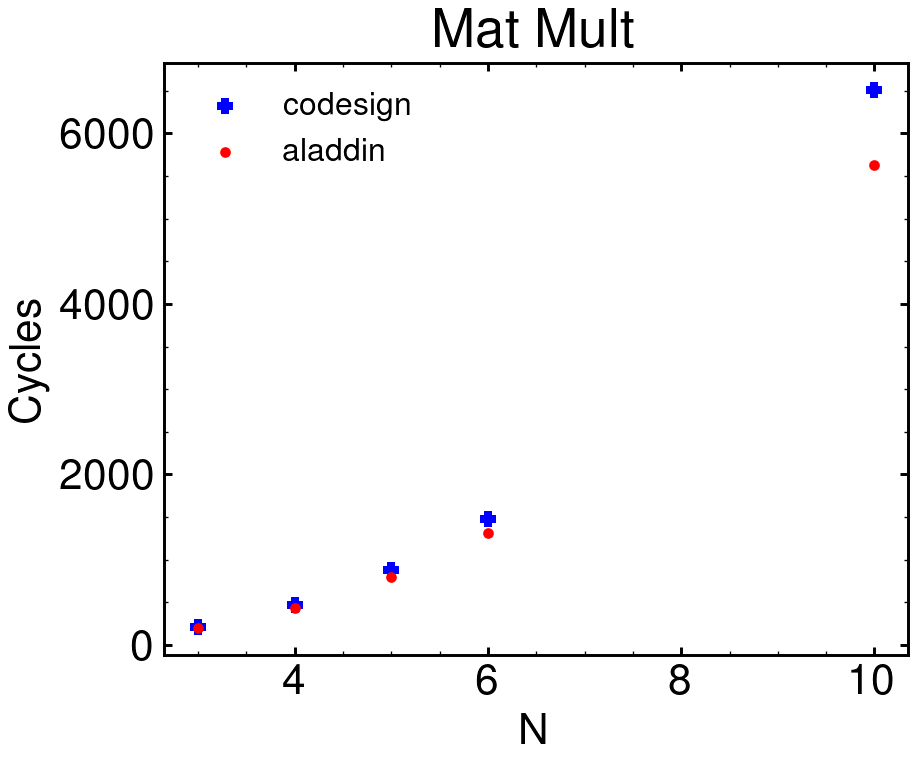

In [20]:
with mpl.rc_context({'lines.linewidth' : 2.25,
'lines.markersize' : 6,  
'figure.figsize': (5,4),
'figure.dpi': 192,
# 'axes.titlepad': 8.0,
'axes.linewidth' : 1.1,
'legend.frameon': False,
'legend.fontsize': 12,
'xtick.major.width' : 1.1,
'ytick.major.width' : 1.1,
'axes.titlesize' : 20,
'axes.labelsize' : 16,
'lines.linewidth' : 3,
'lines.markersize' : 6,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,}):
    # cycles_diff = np.asarray(unrolled_codesign['cycles']) - 9*np.asarray(mat_dim)**3 - 5*np.asarray(mat_dim)**2
    # print(cycles_diff)
    plt.scatter(mat_dim, codesign_post_fix['cycles'], marker='+', label='codesign', c='b')
    # plt.scatter(mat_dim, aladdin['cycles'], marker='.', label='aladdin - no unrolling', c='r', alpha = 0.5)
    plt.scatter(mat_dim, aladdin['cycles'], marker='.', label='aladdin', c='r')
    plt.xlabel('N')
    plt.ylabel('Cycles')
    # plt.yscale('log')
    plt.legend()
    plt.title("Mat Mult")
    plt.show()


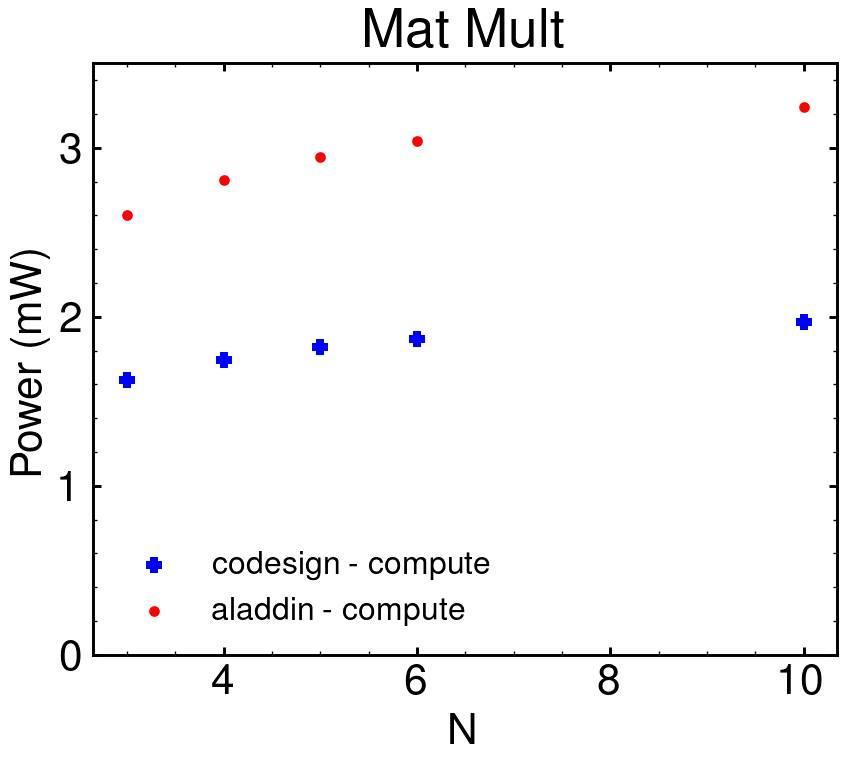

In [22]:
with mpl.rc_context({'lines.linewidth' : 2.25,
'lines.markersize' : 6,  
'figure.figsize': (5,4),
'figure.dpi': 192,
# 'axes.titlepad': 8.0,
'axes.linewidth' : 1.1,
'legend.frameon': False,
'legend.fontsize': 12,
'xtick.major.width' : 1.1,
'ytick.major.width' : 1.1,
'axes.titlesize' : 20,
'axes.labelsize' : 16,
'lines.linewidth' : 3,
'lines.markersize' : 6,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,}):
    plt.scatter(mat_dim, codesign_post_fix['compute power'], marker='+', label='codesign - compute', c='b')
    # plt.scatter(mat_dim, unrolled_codesign['mem power'], marker='^', label='codesign - mem', c='b', alpha = 0.5)

    plt.scatter(mat_dim, aladdin['compute power'], marker='.', label='aladdin - compute', c='r')
    # plt.scatter(mat_dim, unrolled_aladdin['mem power'], marker='^', label='aladdin - mem', c='r', alpha = 0.5)
    plt.xlabel('N')
    plt.ylim(0, 3.5)
    plt.ylabel('Power (mW)')
    # plt.yscale('log')
    plt.legend()
    plt.title("Mat Mult")
    plt.show()

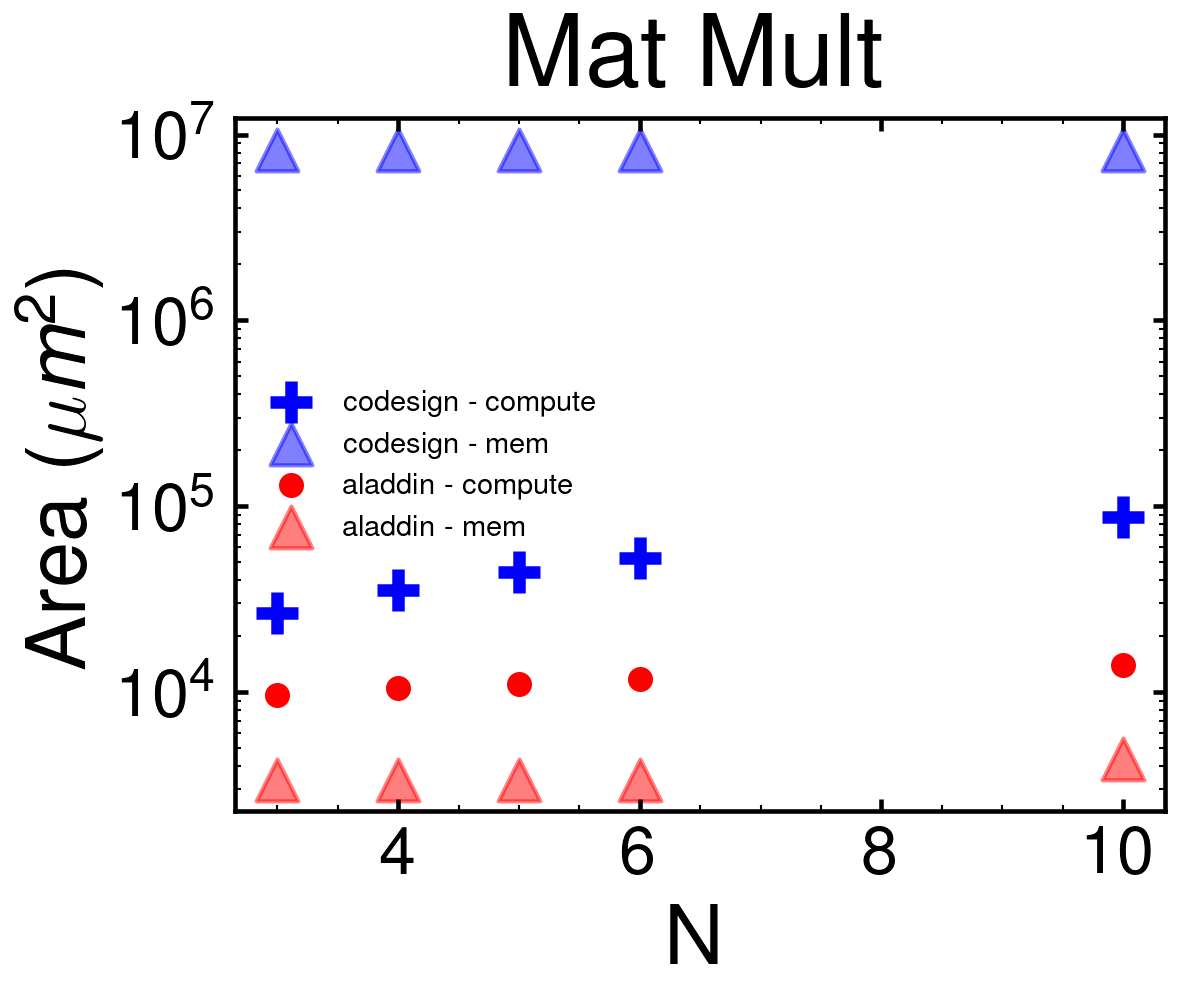

In [86]:
plt.scatter(mat_dim, unrolled_codesign['compute area'], marker='+', label='codesign - compute', c='b')
plt.scatter(mat_dim, unrolled_codesign['mem area'], marker='^', label='codesign - mem', c='b', alpha =0.5)

# total_area = np.array(unrolled_aladdin['compute area']) + np.array(unrolled_aladdin['mem area'])
plt.scatter(mat_dim, unrolled_aladdin['compute area'], marker='.', label='aladdin - compute', c='r')
plt.scatter(mat_dim, unrolled_aladdin['mem area'], marker='^', label='aladdin - mem', c='r', alpha=0.5)
plt.xlabel('N')
plt.ylabel(r'Area ($\mu m^2$)')
plt.yscale('log')
plt.legend()
plt.title("Mat Mult")
plt.show()

## Dict tests

In [2]:
tmp = {'cycles': [338, 59072, 163045, 361536, 0], 
       'avg power': [39249587.42304815 * 1e-6, 158127090.63154665 * 1e-6, 138891920.7748982*1e-6, 123833633.04556464*1e-6, 0.0]
}

for state in tmp:
    for value in state:
        print(value)

c
y
c
l
e
s
a
v
g
 
p
o
w
e
r


## NetworkX hardware representation

In [83]:
config_name = "simple"
hw = HardwareModel(cfg=config_name)

netlist: [('Add0', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 0}), ('Add1', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 1}), ('Add2', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 2}), ('Add3', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 3}), ('Add4', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 4}), ('Add5', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 5}), ('Add6', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 6}), ('Add7', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 7}), ('Add8', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 8}), ('Add9', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 9}), ('Add10', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 10}), ('Add11', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 11}), ('Add12', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 12}), ('Add13', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 13}), ('Add14', {'type': 'pe', 'func

In [84]:
dict(hw.netlist.nodes.data())

{'Add0': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 0},
 'Add1': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 1},
 'Add2': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 2},
 'Add3': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 3},
 'Add4': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 4},
 'Add5': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 5},
 'Add6': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 6},
 'Add7': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 7},
 'Add8': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 8},
 'Add9': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 9},
 'Add10': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 10},
 'Add11': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 11},
 'Add12': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 12},
 'Add13': {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 13},
 'Add14': {'type': 'pe', 'function': 'Add', 'in_use': 

In [85]:
for k,v in dict(hardwareModel.get_nodes_with_func(hw.netlist, "Add")).items():
    print(k)
    print(v)

Add0
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 0}
Add1
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 1}
Add2
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 2}
Add3
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 3}
Add4
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 4}
Add5
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 5}
Add6
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 6}
Add7
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 7}
Add8
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 8}
Add9
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 9}
Add10
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 10}
Add11
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 11}
Add12
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 12}
Add13
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 13}
Add14
{'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 14}


In [86]:
hw_netlist = nx.DiGraph() # by using directed graphs to properly indicate inputs and outputs.

In [87]:
print(hw.hw_allocated)

{'Add': 15, 'Regs': 30, 'Mult': 10, 'Sub': 15, 'FloorDiv': 10, 'Gt': 1, 'And': 1, 'Or': 1, 'Mod': 1, 'LShift': 1, 'RShift': 1, 'BitOr': 1, 'BitXor': 1, 'BitAnd': 1, 'Eq': 1, 'NotEq': 1, 'Lt': 1, 'LtE': 1, 'GtE': 1, 'IsNot': 1, 'USub': 1, 'UAdd': 1, 'Not': 1, 'Invert': 1}


In [88]:
for k, v in hw.hw_allocated.items():
    if k == 'Regs':
        type = "memory"
    else:
        type = "pe"
    for i in range(v):
        hw_netlist.add_node((k + str(i)), type=type, function = k, in_use=False, idx=i)
    # print(f"k: {k}, v: {v}")
for node in hw_netlist.nodes:
    print(node)
    if "Regs" in node: continue
    for i in range(hw.hw_allocated["Regs"]):
        hw_netlist.add_edge("Regs" + str(i), node)
        hw_netlist.add_edge(node, "Regs" + str(i))
print(hw_netlist)
print(hw_netlist.nodes.data())
print(list(hw_netlist.edges))

Add0
Add1
Add2
Add3
Add4
Add5
Add6
Add7
Add8
Add9
Add10
Add11
Add12
Add13
Add14
Regs0
Regs1
Regs2
Regs3
Regs4
Regs5
Regs6
Regs7
Regs8
Regs9
Regs10
Regs11
Regs12
Regs13
Regs14
Regs15
Regs16
Regs17
Regs18
Regs19
Regs20
Regs21
Regs22
Regs23
Regs24
Regs25
Regs26
Regs27
Regs28
Regs29
Mult0
Mult1
Mult2
Mult3
Mult4
Mult5
Mult6
Mult7
Mult8
Mult9
Sub0
Sub1
Sub2
Sub3
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
FloorDiv0
FloorDiv1
FloorDiv2
FloorDiv3
FloorDiv4
FloorDiv5
FloorDiv6
FloorDiv7
FloorDiv8
FloorDiv9
Gt0
And0
Or0
Mod0
LShift0
RShift0
BitOr0
BitXor0
BitAnd0
Eq0
NotEq0
Lt0
LtE0
GtE0
IsNot0
USub0
UAdd0
Not0
Invert0
DiGraph with 99 nodes and 4140 edges
[('Add0', {'type': 'pe', 'function': 'Add', 'in_use': False, 'idx': 0}), ('Add1', {'type': 'pe', 'function': 'Add', 'in_use': False, 'idx': 1}), ('Add2', {'type': 'pe', 'function': 'Add', 'in_use': False, 'idx': 2}), ('Add3', {'type': 'pe', 'function': 'Add', 'in_use': False, 'idx': 3}), ('Add4', {'type': 'pe', 'function': 'Add

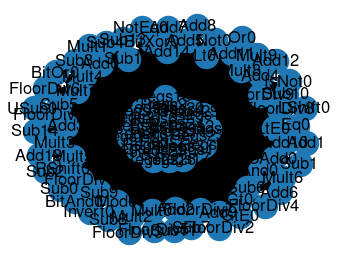

In [89]:
nx.draw(hw_netlist, with_labels=True)
plt.show()

In [90]:
nx.write_gml(hw_netlist, f'architectures/{config_name}.gml')

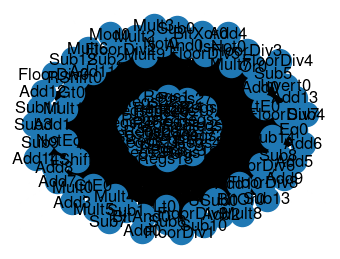

In [91]:
test = nx.read_gml(f"architectures/{config_name}.gml")
nx.draw(test, with_labels=True)
plt.show()

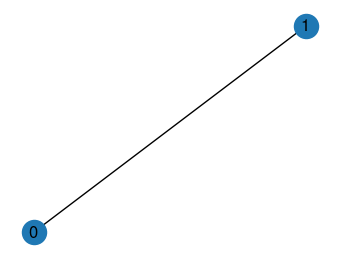

In [31]:
test_graph = nx.path_graph(2)
nx.draw(test_graph, with_labels=True)
plt.show()

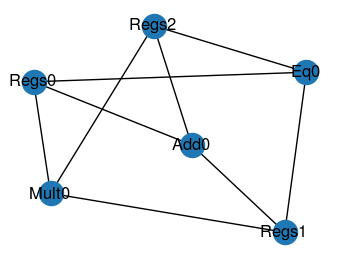

In [32]:
test_2 = test.copy()

test_2.remove_node('Regs0')
nx.draw(test, with_labels=True)
plt.show()

In [42]:
matcher = nx.isomorphism.GraphMatcher(test, test_2)
matcher.subgraph_is_monomorphic()

True

In [21]:
node_data = test.nodes.data()
print(node_data)

[('Add0', {'type': 'pe', 'function': 'Add', 'in_use': 0, 'idx': 0}), ('Regs0', {'type': 'memory', 'function': 'Regs', 'in_use': 0, 'idx': 0}), ('Regs1', {'type': 'memory', 'function': 'Regs', 'in_use': 0, 'idx': 1}), ('Regs2', {'type': 'memory', 'function': 'Regs', 'in_use': 0, 'idx': 2}), ('Mult0', {'type': 'pe', 'function': 'Mult', 'in_use': 0, 'idx': 0}), ('Eq0', {'type': 'pe', 'function': 'Eq', 'in_use': 0, 'idx': 0})]


In [61]:
for k, v in dict(node_data).items():
    if v['function'] == 'Add':
        print(f"k: {k}, v: {v}")
        v['in_use'] = True

k: Add0, v: {'type': 'pe', 'function': 'Add', 'in_use': True}
k: Add1, v: {'type': 'pe', 'function': 'Add', 'in_use': True}
k: Add2, v: {'type': 'pe', 'function': 'Add', 'in_use': True}


In [62]:
test.nodes['Add1']['type'] = 'test'

In [64]:
for k, v in dict(node_data).items():
    v["in_use"] = False

In [63]:
for k, v in dict(node_data).items():
        print(f"k: {k}, v: {v}")

k: Add0, v: {'type': 'pe', 'function': 'Add', 'in_use': True}
k: Add1, v: {'type': 'test', 'function': 'Add', 'in_use': True}
k: Add2, v: {'type': 'pe', 'function': 'Add', 'in_use': True}
k: Regs0, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs1, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs2, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs3, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs4, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs5, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs6, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs7, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Regs8, v: {'type': 'memory', 'function': 'Regs', 'in_use': False}
k: Mult0, v: {'type': 'pe', 'function': 'Mult', 'in_use': False}
k: Mult1, v: {'type': 'pe', 'function': 'Mult', 'in_use': False}
k: Mult2, v: {'type': 'pe', 'function': 'Mult', 'in_use': Fal